<h1 style='color: white; font-size: 36px;'>House Pricing</h1>

## Importando bibliotecas

In [3]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings

In [4]:
warnings.filterwarnings("ignore")

### Obs:

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Vou utilizar um dataset disponível no Kaggle que foi gerado por computador para treinamento de machine learning. Vou levar em conta apenas alguns dados, excluindo alguns outros para direcionar melhor nossa analise. Os dados que que usarei estarão listados a seguir</p>

### Dados:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>precos</b> - Preços do imóveis</li>
    <li><b>area</b> - Área do imóvel</li>
    <li><b>garagem</b> - Número de vagas de garagem</li>
    <li><b>banheiros</b> - Número de banheiros</li>
    <li><b>lareira</b> - Número de lareiras</li>
    <li><b>marmore</b> - Se o imóvel possui acabamento em mármore branco (1) ou não (0)</li>
    <li><b>andares</b> - Se o imóvel possui mais de um andar (1) ou não (0)</li>
</ul>

## Leitura dos dados

In [5]:
dados = pd.read_csv('Dados/HousePrices_HalfMil.csv')

In [6]:
dados

,Area,Garage,FirePlace,Baths,White Marble,Black Marble,Indian Marble,Floors,City,Solar,Electric,Fiber,Glass Doors,Swiming Pool,Garden,Prices
0,164,2,0,2,0,1,0,0,3,1,1,1,1,0,0,43800
1,84,2,0,4,0,0,1,1,2,0,0,0,1,1,1,37550
2,190,2,4,4,1,0,0,0,2,0,0,1,0,0,0,49500
3,75,2,4,4,0,0,1,1,1,1,1,1,1,1,1,50075
4,148,1,4,2,1,0,0,1,2,1,0,0,1,1,1,52400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,128,3,4,2,1,0,0,1,2,0,1,0,1,1,1,55900
499996,30,2,4,5,0,0,1,0,1,0,0,1,0,0,1,29250
499997,174,3,3,2,0,1,0,1,1,1,1,1,0,1,0,51350
499998,121,1,4,5,0,1,0,1,3,0,1,1,1,0,0,62725


Como vou realizar as analises apenas com alguns dados, vou deixar apenas os precos(minha variavel dependente), area, garagem, banheiros, lareira, marmore e andares, vou excluir as demais

In [7]:
dados = dados.drop(columns=['Black Marble', 'Indian Marble', 'Solar', 'City', 'Electric', 'Fiber', 'Glass Doors', 'Swiming Pool', 'Garden'])
dados.head()

,Area,Garage,FirePlace,Baths,White Marble,Floors,Prices
0,164,2,0,2,0,0,43800
1,84,2,0,4,0,1,37550
2,190,2,4,4,1,0,49500
3,75,2,4,4,0,1,50075
4,148,1,4,2,1,1,52400


## Visualizar os dados

In [8]:
dados

,Area,Garage,FirePlace,Baths,White Marble,Floors,Prices
0,164,2,0,2,0,0,43800
1,84,2,0,4,0,1,37550
2,190,2,4,4,1,0,49500
3,75,2,4,4,0,1,50075
4,148,1,4,2,1,1,52400
...,...,...,...,...,...,...,...
499995,128,3,4,2,1,1,55900
499996,30,2,4,5,0,0,29250
499997,174,3,3,2,0,1,51350
499998,121,1,4,5,0,1,62725


## Verificando o tamanho do dataset

In [9]:
dados.shape

(500000, 7)

# <font color='white' style='font-size: 30px;'>Análises Preliminares</font>

## Estatísticas descritivas

In [14]:
dados.describe()

,Area,Garage,FirePlace,Baths,White Marble,Floors,Prices
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000
mean,124.929554,2.001290,2.003398,2.998074,0.332992,0.499386,42050.139350
std,71.795363,0.817005,1.414021,1.414227,0.471284,0.500000,12110.237201
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,7725.000000
25%,63.000000,1.000000,1.000000,2.000000,0.000000,0.000000,33500.000000
50%,125.000000,2.000000,2.000000,3.000000,0.000000,0.000000,41850.000000
75%,187.000000,3.000000,3.000000,4.000000,1.000000,1.000000,50750.000000
max,249.000000,3.000000,4.000000,5.000000,1.000000,1.000000,77975.000000


## Matriz de correlação

In [15]:
dados.corr().round(3)

,Area,Garage,FirePlace,Baths,White Marble,Floors,Prices
Area,1.000,-0.001,0.000,-0.000,0.003,-0.001,0.148
Garage,-0.001,1.000,0.001,-0.004,0.001,-0.001,0.100
FirePlace,0.000,0.001,1.000,0.001,0.001,0.000,0.089
Baths,-0.000,-0.004,0.001,1.000,0.002,-0.001,0.145
White Marble,0.003,0.001,0.001,0.002,1.000,0.000,0.448
Floors,-0.001,-0.001,0.000,-0.001,0.000,1.000,0.619
Prices,0.148,0.100,0.089,0.145,0.448,0.619,1.000


# Comportamento da Variável Dependente (Y)

# Análises gráficas

## Configuracao do estilo e cor dos gráficos

In [17]:
sns.set_palette("Accent")
sns.set_style("darkgrid")


Vou fazer um mapa de calor so para ficar mais visual a correlacao entre os elementos

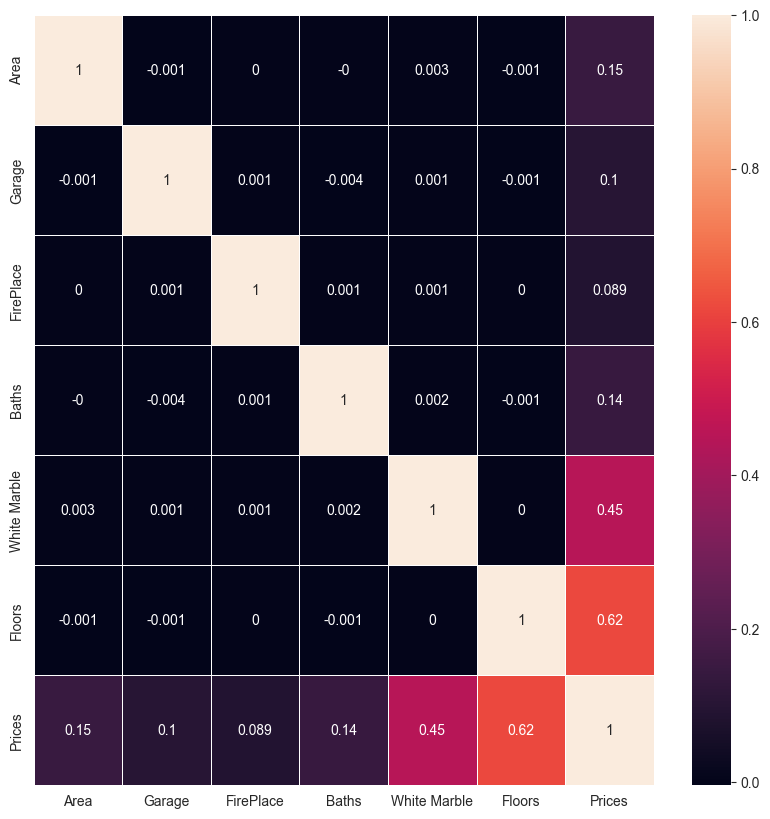

In [18]:
fig, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(dados.corr().round(3), annot=True, linewidths=.5, ax=ax)

plt.show()

## Box plot da variável *dependente* (y)

https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot

<Axes: title={'center': 'Preço das Casas'}, ylabel='Preço'>

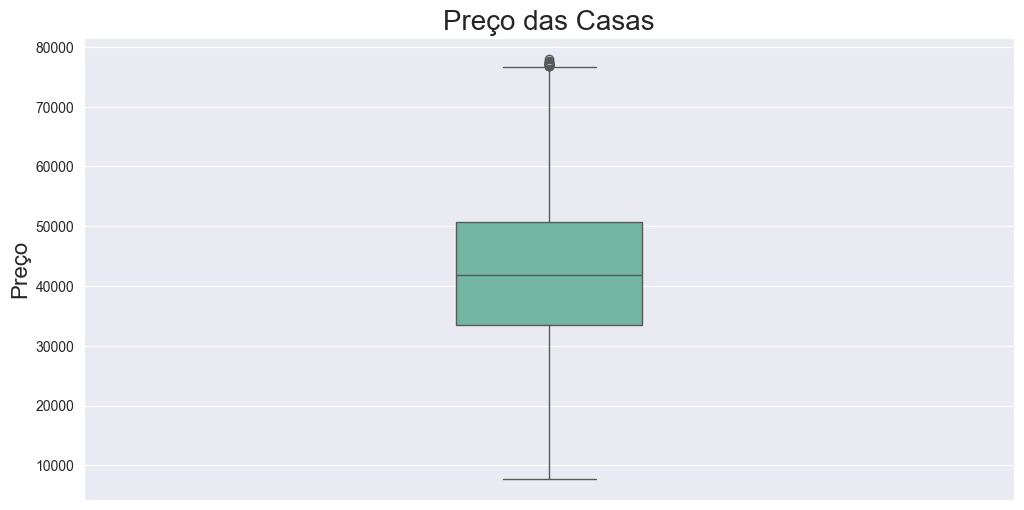

In [19]:
ax = sns.boxplot(data=dados['Prices'], orient="v", width=0.2 ,palette="Set2")
ax.figure.set_size_inches(12, 6)
ax.set_title('Preço das Casas', fontsize=20)
ax.set_ylabel('Preço', fontsize=16)
ax

## Comparando a variável *dependente* (y) juntamente com outras característica

### Box-plot (Preço X Garagem)

<Axes: title={'center': 'Preco X Garagem'}, xlabel='Quantidade de Vagas', ylabel='Preço'>

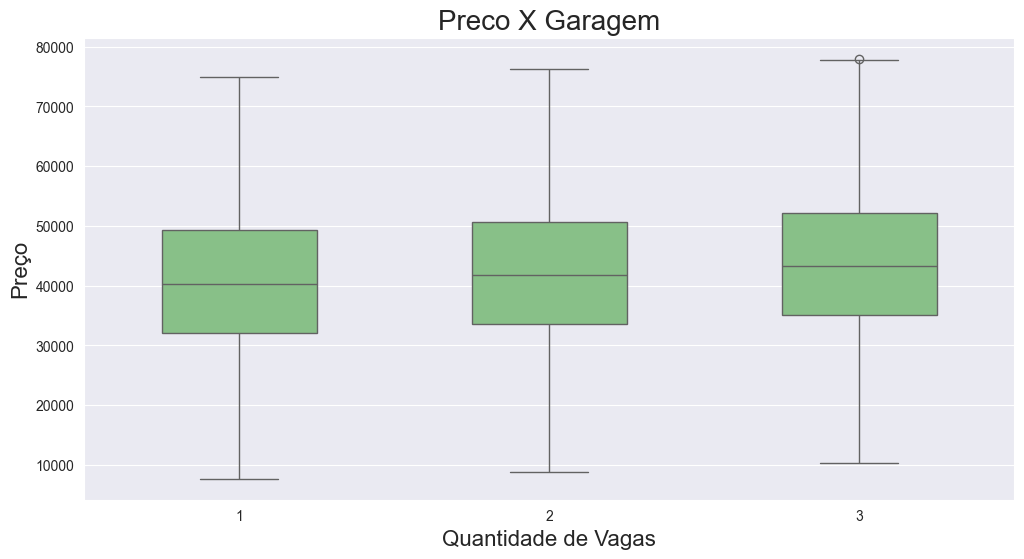

In [20]:
ax = sns.boxplot(x='Garage', y='Prices', data=dados, orient = 'v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Preco X Garagem', fontsize=20)
ax.set_ylabel('Preço', fontsize=16)
ax.set_xlabel('Quantidade de Vagas', fontsize=16)
ax

### Box-plot (Preço X Banheiros)

<Axes: title={'center': 'Preco X Banheiros'}, xlabel='Quantidade de Banheiros', ylabel='Preço'>

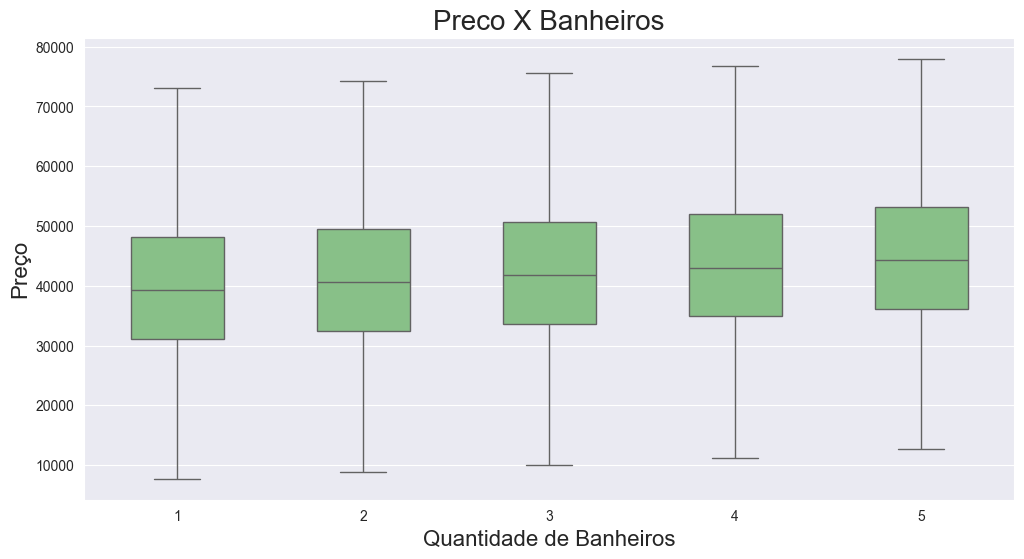

In [21]:
ax = sns.boxplot(x='Baths', y='Prices', data=dados, orient = 'v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Preco X Banheiros', fontsize=20)
ax.set_ylabel('Preço', fontsize=16)
ax.set_xlabel('Quantidade de Banheiros', fontsize=16)
ax

### Box-plot (Preço X Lareira)

<Axes: title={'center': 'Preco X Lareiras'}, xlabel='Quantidade de Lareiras', ylabel='Preço'>

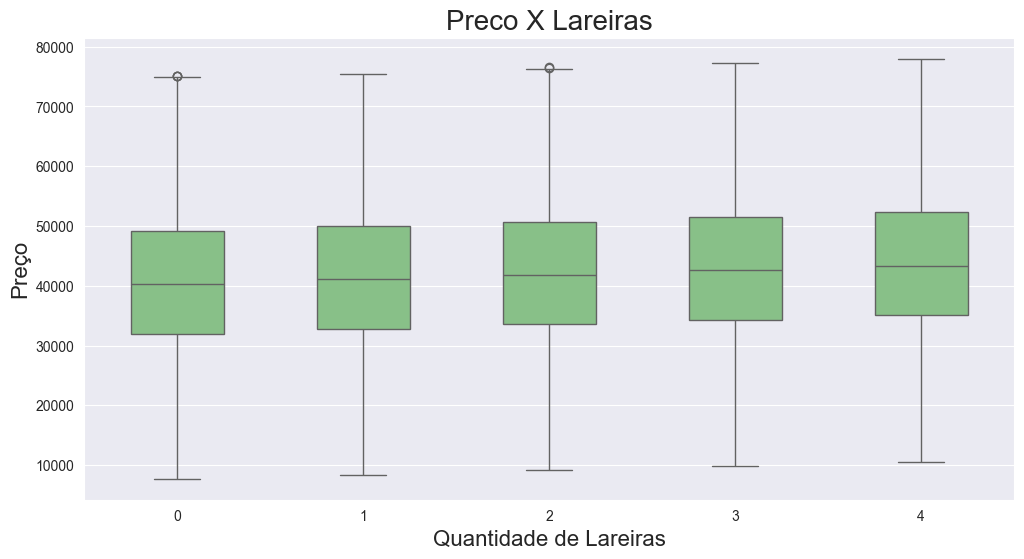

In [22]:
ax = sns.boxplot(x='FirePlace', y='Prices', data=dados, orient = 'v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Preco X Lareiras', fontsize=20)
ax.set_ylabel('Preço', fontsize=16)
ax.set_xlabel('Quantidade de Lareiras', fontsize=16)
ax

### Box-plot (Preço X Acabamento em Mármore)

<Axes: title={'center': 'Preco X Acabamento em Marmore'}, xlabel='Acabamento em marmore', ylabel='Preço'>

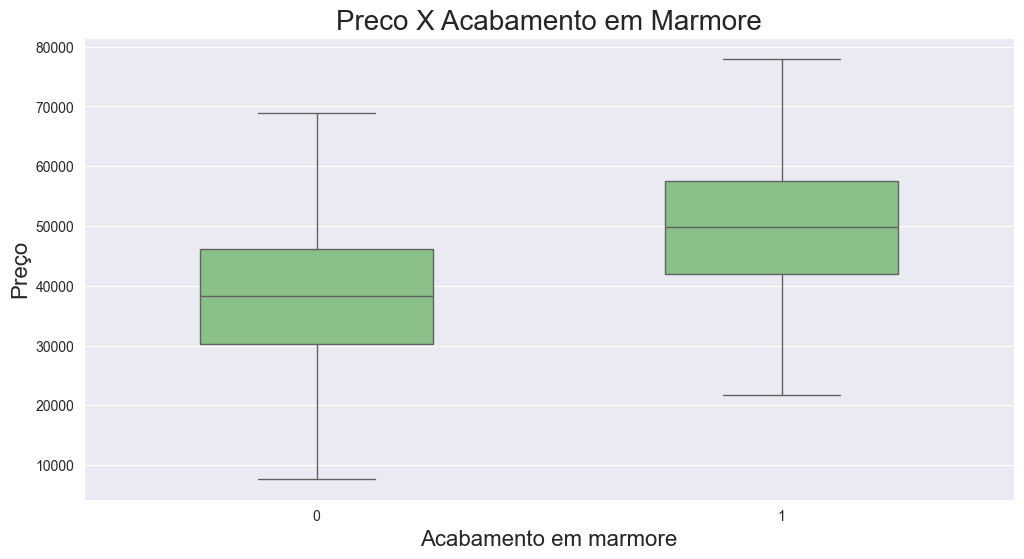

In [23]:
ax = sns.boxplot(x='White Marble', y='Prices', data=dados, orient = 'v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Preco X Acabamento em Marmore', fontsize=20)
ax.set_ylabel('Preço', fontsize=16)
ax.set_xlabel('Acabamento em marmore', fontsize=16)
ax

### Box-plot (Preço X Andares)

<Axes: title={'center': 'Preco X Andares'}, xlabel='Quantidade de Andares', ylabel='Preço'>

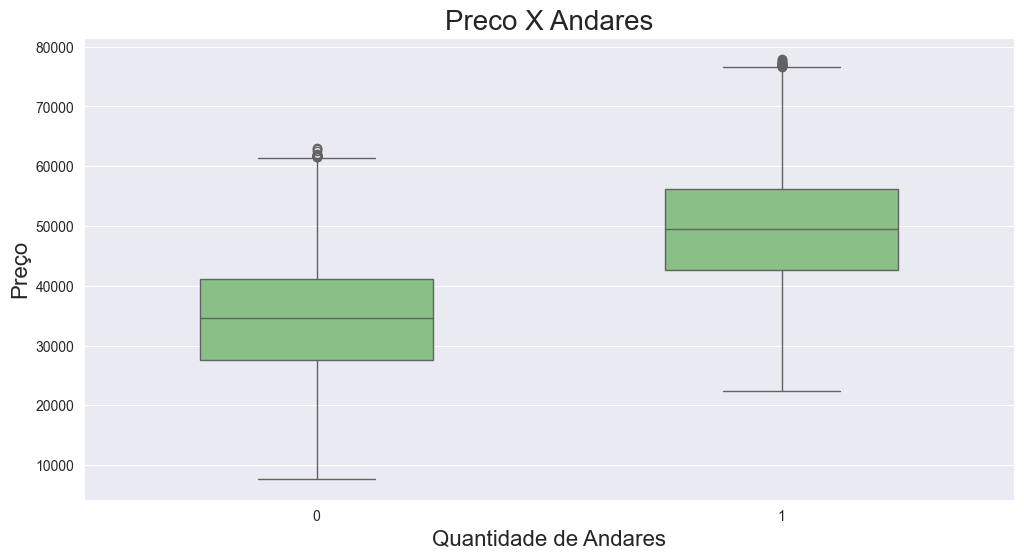

In [24]:
ax = sns.boxplot(x='Floors', y='Prices', data=dados, orient = 'v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Preco X Andares', fontsize=20)
ax.set_ylabel('Preço', fontsize=16)
ax.set_xlabel('Quantidade de Andares', fontsize=16)
ax

## Distribuição de frequências da variável *dependente* (y)

https://seaborn.pydata.org/generated/seaborn.distplot.html?highlight=distplot#seaborn.distplot

<Axes: title={'center': 'Distribuição de Frequências'}, xlabel='Preço', ylabel='Frequência'>

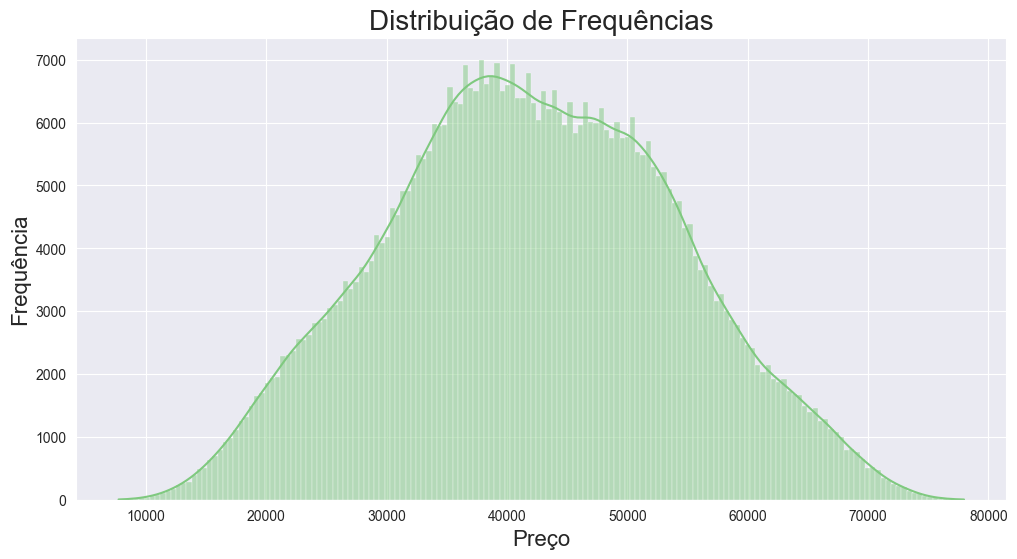

In [25]:
ax = sns.histplot(dados['Prices'], kde=True)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_ylabel('Frequência', fontsize=16)
ax.set_xlabel('Preço', fontsize=16)
ax

## Gráficos de dispersão entre as variáveis do dataset

## Plotando o pairplot fixando somente uma variável no eixo y

https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot

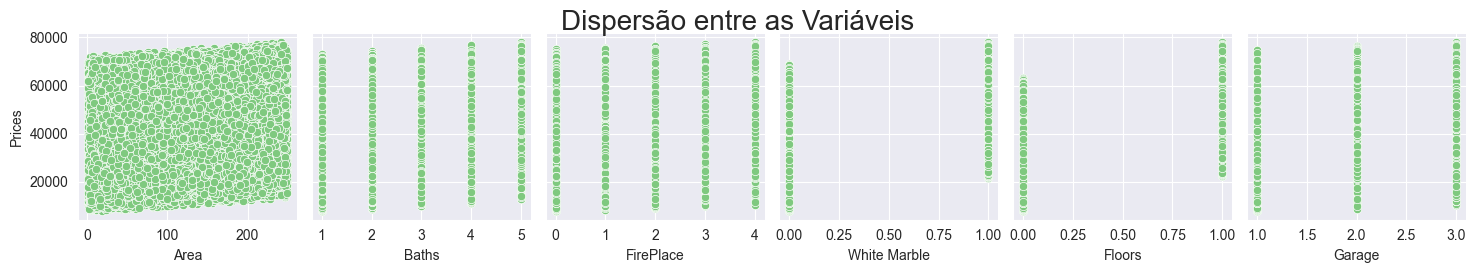

In [26]:
ax = sns.pairplot(dados, y_vars='Prices', x_vars=['Area', 'Baths', 'FirePlace', 'White Marble', 'Floors', 'Garage'])
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

# Estimando um Modelo de Regressão Linear

## Criando uma Series (pandas) para armazenar a variável dependente (y)

In [27]:
y = dados['Prices']

## Criando um DataFrame (pandas) para armazenar as variáveis explicativas (X)

In [28]:
x = dados[['Area', 'Baths', 'FirePlace', 'White Marble', 'Floors', 'Garage']]

## Criando os datasets de treino e de teste

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2811)

Verificar os tamanhos dos dataframes gerados pelo train_test_split

In [30]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(350000, 6)
(150000, 6)
(350000,)
(150000,)


## Importando *LinearRegression* e *metrics* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/modules/classes.html#regression-metrics

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Instanciando a classe *LinearRegression()*

In [32]:
modelo = LinearRegression()

## Utilizando o método *fit()* para estimar o modelo linear utilizando os dados de TREINO (y_train e X_train)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit

In [33]:
modelo.fit(x_train, y_train)

LinearRegression()

## Obtendo o coeficiente de determinação (R²) do modelo estimado com os dados de TREINO

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score

In [34]:
print('R² = {}'.format(modelo.score(x_train, y_train).round(2)))

R² = 0.65


## Gerando previsões para os dados de TESTE (X_test) utilizando o método *predict()*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict

In [35]:
y_previsto = modelo.predict(x_test)

## Obtendo o coeficiente de determinação (R²) para as previsões do nosso modelo

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

In [36]:
print('R² = %s' % metrics.r2_score(y_test, y_previsto).round(2))

R² = 0.64


# <font color='white' style='font-size: 30px;'>Obtendo Previsões Pontuais</font>

## Criando um simulador simples

Crie um simulador que gere estimativas de preço a partir de um conjunto de informações de um imóvel.

In [37]:
entrada = x_test[0:1]
entrada

,Area,Baths,FirePlace,White Marble,Floors,Garage
188274,25,4,3,0,1,3


## Obtendo métricas para o modelo com Temperatura Máxima

In [68]:
EQM = metrics.mean_squared_error(y_test, y_previsto).round(2)
REQM = np.sqrt(metrics.mean_squared_error(y_test, y_previsto)).round(2)
R2 = metrics.r2_score(y_test, y_previsto).round(2)

pd.DataFrame([EQM, REQM, R2], ['EQM', 'REQM', 'R²'], columns=['Métricas'])

,Métricas
EQM,52091445.53
REQM,7217.44
R²,0.64


## Importando a biblioteca pickle

In [69]:
import pickle

## Salvando o modelo estimado

In [70]:
output = open('modelo_preço', 'wb')
pickle.dump(modelo, output)
output.close()

### Em um novo notebook/projeto Python

<h4></h4>

```sh
import pickle

modelo = open('modelo_preço','rb')
lm_new = pickle.load(modelo)
modelo.close()

area = 'inserir um valor'
garagem = 'inserir um valor'
banheiros = 'inserir um valor'
lareira = 'inserir um valor'
marmore = 'inserir um valor'
andares = 'inserir um valor'

entrada = [[area, garagem, banheiros, lareira, marmore, andares]]

print('$ {0:.2f}'.format(lm_new.predict(entrada)[0]))
```

<h4> </h4>

```
$ Previsao de preco $
```